# 1. Install dependencies

In [20]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
#!cd yolov5 & pip install -r requirements.txt

# 2. Import libraries

In [1]:
import torch
import os

In [53]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1050 with Max-Q Design (UUID: GPU-71b39a18-a397-cc6d-2a33-e2389fa9adbf)


# 3. Train data

### YOLOv5: https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data



In [13]:
path = os.getcwd()
print(path)

C:\Users\gordo\Desktop\imagerec\datasets\labels\val


In [23]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [18]:
os.chdir("C:/Users/gordo/Desktop/imagerec")

In [45]:
!cd yolov5 && python train.py --img 640 --batch 70 --epochs 10 --data test.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=test.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=70, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.2-53-gf0e5a60 Python-3.10.4 torch-1.12.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

  0%|          | 0/1 [00:00<?, ?it/s]
        9/9         0G       0.11    0.02738          0        115        640:   0%|          | 0/1 [02:17<?, ?it/s]
        9/9         0G       0.11    0.02738          0        115        640: 100%|##########| 1/1 [02:17<00:00, 137.42s/it]
        9/9         0G       0.11    0.02738          0        115        640: 100%|##########| 1/1 [02:17<00:00, 137.42s/it]

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/1 [00:00<?, ?it/s]WARNING: NMS time limit 0.930s exceeded

                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:05<00:00,  5.93s/it]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:05<00:00,  5.93s/it]
                   all         21         21    0.00111     0.0476   0.000682   0.000136

10 epochs completed in 0.406 hours.
Optimizer stripped from ru

In [10]:
# import os
# os.chdir(r"C:\Users\gordo\Desktop\imagerec\datasets\labels\val")                                                                                                                       
# for paths,folders,files in os.walk(os.getcwd()):
#         count= 0
#         for file in files:
#             if file.endswith("txt"):
#                 reading_file = open(file,"r")
#                 new_str = ""
                
#                 for line in reading_file:
                   
#                     new_line = "0 0"+line[2:]
#                     new_str += new_line
#                 writing_file = open(file,"w")
#                 writing_file.write(new_str)
#                 writing_file.close()
                

# 4. Testing the model

In [46]:
model =  torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp16/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\gordo/.cache\torch\hub\master.zip
YOLOv5  2022-8-25 Python-3.10.4 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [30]:
import matplotlib as plt


In [50]:
results = model('C:/Users/gordo/Desktop/label/custom_dataset/test/Up098.jpg')

In [51]:
results.print()

image 1/1: 1080x1920 (no detections)
Speed: 26.9ms pre-process, 184.5ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


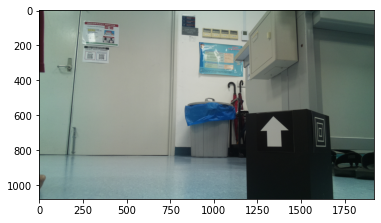

In [52]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
!python val.py --data test.yaml --task test